# To Dos
<br><div class="input-group"><input type="text" class="to-dos-new-task form-control"></input><span class="input-group-btn"><button class="to-dos-add-task btn btn-primary">Add Task</button></span></div><div class="existing-to-dos"></div>

# Numpy distributions function

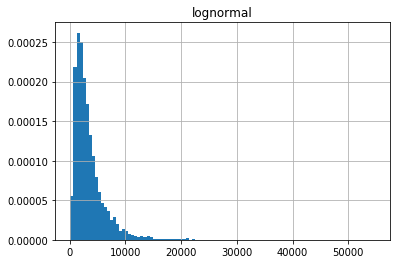

In [10]:
import numpy as np
import pandas as pd

%matplotlib inline

def GenerateDistribution(function, params, size, plot=None):
    ''' function = normal, lognormal, beta, uniform or triangular
        params = [mu, sigma], [a,b], [low, high], [low,mid,high]
    '''
    # ------------- options based on params length
    if len(params) < 2 :
            print('function takes at least 2 arguments')
            return
    elif len(params) == 2:
        # all functions with 2 parameters
        
        if function == 'normal':                                      # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html
            # s = np.random.normal(mean, sigma,size)
            s =  np.random.normal(params[0], params[1], size)
        if function == 'lognormal':                                   # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.lognormal.html
            #s = np.random.lognormal(mean, sigma, size)  
            s =  np.random.lognormal(params[0], params[1], size)        
        elif function == 'beta':                                      # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.beta.html
            #s = np.random.beta(a,b size)
            s = np.random.beta(params[0], params[1], size)
        elif function == 'uniform':                                   # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html
            #s = np.random.uniform(low, high, size)
            s = np.random.uniform(params[0], params[1], size)
    
    elif len(params) == 3:
        if function == 'triangular':                                  # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.triangular.html
            #s = np.random.triangular(left, mode, right, size)
            s = np.random.triangular(params[0], params[1], params[2], size)
        else:
            print('you supplied more than 3 params')
            return
    
    # -------------- Plot
    if plot !=None :
        #
        dist = pd.DataFrame({function:s})
        dist.hist(bins=100, density=True , stacked = True,cumulative=False)
        
        # pdf_normal     = 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) )
        # pdf_log_normal = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))
        # pdf_uniform    = np.ones_like(bins)  # where count, bins, ignored = plt.hist(np.random.uniform(low,high,size), 15, normed=True)
    
    return s

# -----------------------------
distribution_data = GenerateDistribution('lognormal', [7.87,.74], 10000, 1)

In [11]:
distribution_data.max()
distribution_data.min()
distribution_data.mean()


3476.8353060172244

# Distribution with min, max, mean and std

 https://stackoverflow.com/questions/50626710/generating-random-numbers-with-predefined-mean-std-min-and-max

alpha: 12.16   beta: 4.34  scale: 19.00  location : 1.00
mean: 15.0 std: 2.0
min: 5.44860207745 max: 19.8506217498


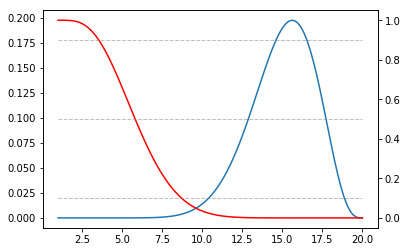

In [16]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

def my_distribution(min_val, max_val, mean, std):
    scale = max_val - min_val
    location = min_val
    # Mean and standard deviation of the unscaled beta distribution
    unscaled_mean = (mean - min_val) / scale
    unscaled_var = (std / scale) ** 2
    # Computation of alpha and beta can be derived from mean and variance formulas
    t = unscaled_mean / (1 - unscaled_mean)
    beta = ((t / unscaled_var) - (t * t) - (2 * t) - 1) / ((t * t * t) + (3 * t * t) + (3 * t) + 1)
    alpha = beta * t
    # Not all parameters may produce a valid distribution
    if alpha <= 0 or beta <= 0:
        raise ValueError('Cannot create distribution for the given parameters.')
    # Make scaled beta distribution with computed parameters
    
    print('alpha: {:.2f}   beta: {:.2f}  scale: {:.2f}  location : {:.2f}'.format(alpha, beta, scale, location))
    
    return scipy.stats.beta(alpha, beta, scale=scale, loc=location)

np.random.seed(100)

min_val = 1
max_val = 20
mean = 15
std = 2
my_dist = my_distribution(min_val, max_val, mean, std)
# Plot distribution PDF
x = np.linspace(min_val, max_val, 100)

x_reverse =  np.arange(max_val, min_val, -100)


fig, ax = plt.subplots()

ax.plot(x, my_dist.pdf(x))
ax1 = ax.twinx()

ax1.plot(np.flip(x,0), my_dist.cdf(x), color='r')
ax1.plot([min_val, max_val],[.1,.1], color='grey', linestyle='--', linewidth = 1, alpha=.5)
ax1.plot([min_val, max_val],[.5,.5], color='grey', linestyle='--', linewidth = 1, alpha=.5)
ax1.plot([min_val, max_val],[.9,.9], color='grey', linestyle='--', linewidth = 1, alpha=.5)
# Stats
print('mean:', my_dist.mean(), 'std:', my_dist.std())
# Get a large sample to check bounds
sample = my_dist.rvs(size=100000)
print('min:', sample.min(), 'max:', sample.max())

In [11]:
x

array([  1.        ,   1.19191919,   1.38383838,   1.57575758,
         1.76767677,   1.95959596,   2.15151515,   2.34343434,
         2.53535354,   2.72727273,   2.91919192,   3.11111111,
         3.3030303 ,   3.49494949,   3.68686869,   3.87878788,
         4.07070707,   4.26262626,   4.45454545,   4.64646465,
         4.83838384,   5.03030303,   5.22222222,   5.41414141,
         5.60606061,   5.7979798 ,   5.98989899,   6.18181818,
         6.37373737,   6.56565657,   6.75757576,   6.94949495,
         7.14141414,   7.33333333,   7.52525253,   7.71717172,
         7.90909091,   8.1010101 ,   8.29292929,   8.48484848,
         8.67676768,   8.86868687,   9.06060606,   9.25252525,
         9.44444444,   9.63636364,   9.82828283,  10.02020202,
        10.21212121,  10.4040404 ,  10.5959596 ,  10.78787879,
        10.97979798,  11.17171717,  11.36363636,  11.55555556,
        11.74747475,  11.93939394,  12.13131313,  12.32323232,
        12.51515152,  12.70707071,  12.8989899 ,  13.09

In [ ]:
scipy.stats.absolute_import()

# Distribution with P10, P50 P90 as input

In [55]:
def metalog_multi(p10, p50, p90, numberofsamples, p0 = None, p100 = None):
    p10 = float(p10)
    p50 = float(p50)
    p90 = float(p90)
    if p0 != None:
        p0 = float(p0)
    if p100 != None:
        p100 = float(p100)


    samples = []
    for i in range(numberofsamples):
        x = random.random()
        if p0 == None and p100 == None:
            # unbound

            sample = p50 + 0.5 * (np.log((1 - 0.1) / 0.1)) ** (-1) * (p90 - p10) * np.log(x / (1 - x)) + ((1 - 2 * 0.1) * (np.log((1 - 0.1) / 0.1))) ** -1 * (1 - 2 * (p50 - p10) / (p90 - p10)) * (p90 - p10) * (x - 0.5) * np.log(x / (1 - x))

        elif p100 == None:
            # lower bound
            #sample = p0 + e ** (np.log(p50 - p0) + 0.5 * (np.log((1 - 0.1) / 0.1)) ** -1 * np.log((p90 - p0) / (p10 - p0)) * np.log(x / (1 - x)) + ((1 - 2 * 0.1) * (np.log((1 - 0.1) / 0.1))) ** -1 * np.log(((p90 - p0) * (p10 - p0)) / (p50 - p0) ** 2) * (x - 0.5) * np.log(x / (1 - x)))
            
            sample = p0 + np.exp(np.log(p50 - p0) + 0.5 * (np.log((1 - 0.1) / 0.1)) ** -1 * np.log((p90 - p0) / (p10 - p0)) * np.log(x / (1 - x)) + ((1 - 2 * 0.1) * (np.log((1 - 0.1) / 0.1))) ** -1 * np.log(((p90 - p0) * (p10 - p0)) / (p50 - p0) ** 2) * (x - 0.5) * np.log(x / (1 - x)))
            
        elif p0 == None:
            # upper bound
            
            #sample = p100 - e ** (-(-np.log(p100 - p50) - (0.5) * (np.log((1 - 0.1) / 0.1)) ** -1 * np.log((p100 - p90) / (p100 - p10)) * np.log(x / (1 - x)) - ((1 - 2 * 0.1) * (np.log((1 - 0.1) / 0.1))) ** -1 * np.log(((p100 - p90) * (p100 - p10)) / (p100 - p50) ** 2) * (x - 0.5) * np.log(x / (1 - x))))
            
            sample = p100 - np.exp(-(-np.log(p100 - p50) - (0.5) * (np.log((1 - 0.1) / 0.1)) ** -1 * np.log((p100 - p90) / (p100 - p10)) * np.log(x / (1 - x)) - ((1 - 2 * 0.1) * (np.log((1 - 0.1) / 0.1))) ** -1 * np.log(((p100 - p90) * (p100 - p10)) / (p100 - p50) ** 2) * (x - 0.5) * np.log(x / (1 - x))))
            
        else:
            # bound
            #sample = (p0 + p100 * e ** (np.log((p50 - p0) / (p100 - p50)) + (0.5) * (np.log((1 - 0.1) / 0.1)) ** -1 * np.log(((p90 - p0) / (p100 - p90)) / ((p10 - p0) / (p100 - p10))) * np.log(x / (1 - x)) + ((1 - 2 * 0.1) * (np.log((1 - 0.1) / 0.1))) ** -1 * np.log((((p90 - p0) / (p100 - p90)) * ((p10 - p0) / (p100 - p10))) / ((p50 - p0) / (p100 - p50)) ** 2) * (x - 0.5) * np.log(x / (1 - x)))) / (1 + e ** (np.log((p50 - p0) / (p100 - p50)) + (0.5) * (np.log((1 - 0.1) / 0.1)) ** -1 * np.log(((p90 - p0) / (p100 - p90)) / ((p10 - p0) / (p100 - p10))) * np.log(x / (1 - x)) + ((1 - 2 * 0.1) *(np.log((1 - 0.1) / 0.1))) ** -1 * np.log((((p90 - p0) / (p100 - p90)) * ((p10 - p0) / (p100 - p10))) / ((p50 - p0) / (p100 - p50)) ** 2) * (x - 0.5) * np.log(x / (1 - x))))
            
            sample = (p0 + p100 * np.exp(np.log((p50 - p0) / (p100 - p50)) + (0.5) * (np.log((1 - 0.1) / 0.1)) ** -1 * np.log(((p90 - p0) / (p100 - p90)) / ((p10 - p0) / (p100 - p10))) * np.log(x / (1 - x)) + ((1 - 2 * 0.1) * (np.log((1 - 0.1) / 0.1))) ** -1 * np.log((((p90 - p0) / (p100 - p90)) * ((p10 - p0) / (p100 - p10))) / ((p50 - p0) / (p100 - p50)) ** 2) * (x - 0.5) * np.log(x / (1 - x)))) / (1 + np.exp(np.log((p50 - p0) / (p100 - p50)) + (0.5) * (np.log((1 - 0.1) / 0.1)) ** -1 * np.log(((p90 - p0) / (p100 - p90)) / ((p10 - p0) / (p100 - p10))) * np.log(x / (1 - x)) + ((1 - 2 * 0.1) *(np.log((1 - 0.1) / 0.1))) ** -1 * np.log((((p90 - p0) / (p100 - p90)) * ((p10 - p0) / (p100 - p10))) / ((p50 - p0) / (p100 - p50)) ** 2) * (x - 0.5) * np.log(x / (1 - x))))
            
        samples.append(sample)
    return samples


p0_in = 10
p10_in = 20
p50_in = 40
p90_in = 80
p100_in = 250
numberofsamples = 10000
data = metalog_multi(p10_in, p50_in, p90_in, numberofsamples, p0 = p0_in)

p10_out = np.percentile(data,10)
p50_out = np.percentile(data,50)
p90_out = np.percentile(data,90)

print('{} - {} - {}'.format(p10_out, p50_out, p90_out))

19.969654571599236 - 39.8384708763613 - 79.46954933945742


trying to convert the data list ot a scipy distribution 

In [32]:
print(type(data))
print(type(np.asarray(data)))

my_dist = np.asarray(data)
x = np.linspace(0,10000,1)
plt.plot(x, my_dist.pdf(x))
plt.plot(x, my_dist.cdf(x))
# Stats
print('mean:', my_dist.mean(), 'std:', my_dist.std())
# Get a large sample to check bounds
sample = my_dist.rvs(size=100000)
print('min:', sample.min(), 'max:', sample.max())

<class 'list'>
<class 'numpy.ndarray'>


AttributeError: 'numpy.ndarray' object has no attribute 'pdf'

In [36]:
import random
from scipy.stats import norm

def myerson(p10, p50, p90, number_of_samples):
    b_mark = ((float(p90) - float(p50)) / (float(p50) - float(p10)))
    samples = []
    for i in range(number_of_samples):
        rand_numb = random.random()
        factor = norm.ppf(rand_numb, 0, 0.780304146072379)
        if 0.9999 < b_mark < 1.0001: 
            sample = p50 + (p90 - p50) * factor
        else:
            sample = p50 + (p90 - p50)*((b_mark**factor - 1)/(b_mark - 1))
        samples.append(sample)
    return samples

In [37]:
p10_in = 90
p50_in = 100
p90_in = 110  # in fact P10
numberofsamples = 10000
data = myerson(p10_in, p50_in, p90_in, numberofsamples)

p10_out = np.percentile(data,10)
p50_out = np.percentile(data,50)
p90_out = np.percentile(data,90)

print(' P10in : {:.4f}  => P10out : {:.4f}'.format(p10_in,p10_out ))
print(' P50in : {:.4f}  => P50out : {:.4f}'.format(p50_in,p50_out ))
print(' P90in : {:.4f}  => P90out : {:.4f}'.format(p90_in,p90_out ))


 P10in : 90.0000  => P10out : 90.0362
 P50in : 100.0000  => P50out : 99.9105
 P90in : 110.0000  => P90out : 110.0033


In [40]:
norm.rvs()

list

In [38]:
my_dist = data
x = np.linspace(0,10000,1)
plt.plot(x, my_dist.pdf(x))
plt.plot(x, my_dist.cdf(x))
# Stats
print('mean:', my_dist.mean(), 'std:', my_dist.std())
# Get a large sample to check bounds
sample = my_dist.rvs(size=100000)
print('min:', sample.min(), 'max:', sample.max())

AttributeError: 'list' object has no attribute 'pdf'

# Reservoir distributions

|HC yield boundaries|
|----------------------|
| Porosity Range (enter as a percentage)	|1.0|	40.0|
|	HC Saturation (enter as a percentage) 	|15	|95|
|	Formation Volume Factor (FVF, Bo) Range |	1.0000|	4.0000|
|	Gas Expansion Factor (GEF, 1/Bg) Range 	|25	|750|
|	Recovery Efficiency - OIL (enter as a percentage) |	1	|75|
|	Recovery Efficiency - GAS (enter as a percentage) |	20	|95|

<table>
<th><td>Properties</td><td>Distributions</td></tr>
<tr><td>Area</td><td>NORMAL</td></tr>
<tr><td>NTG</td><td>Beta</td></tr>
<tr><td>Porosity</td><td>NORMAL</td></tr>
<tr><td>Saturation</td><td>NORMAL</td></tr>
<tr><td>FVF</td><td>NORMAL</td></tr>
<tr><td>GOR</td><td>Lognormal</td></tr>
<tr><td>Recovery</td><td>Beta</td></tr>
<tr><td></td><td></td></tr>
<tr><td>Geometry</td><td>Slab/Uniform</td></tr>
</table>


In [151]:
df = pd.read_excel(r'C:\Users\philippe.mieussens\Documents\99-Python\999-Input-Data\Project_Rosbif\CrystalBall.xlsx', sheetname='Input')
df

,Distribution,low,best,high
Area,none,NaN,3.00,NaN
h,none,NaN,20.00,NaN
Shape,none,NaN,1.00,NaN
GRV,lognormal,198.30,430.00,640.20
NTG,normal,0.15,0.30,0.45
Phi,normal,0.27,0.29,0.31
So,normal,0.68,0.78,0.88
HCPV,none,NaN,NaN,NaN
FVF (1/Bo),none,1.15,1.15,1.15
Oil RF,none,NaN,0.25,NaN


In [153]:
df.index.tolist()

['Area',
 'h',
 'Shape',
 'GRV',
 'NTG',
 'Phi',
 'So',
 'HCPV',
 'FVF (1/Bo)',
 'Oil RF']

In [161]:
dTest = pd.DataFrame({'Area':[1,2], 'h':[1,2], 'Shape':[1,2], 'GRV':[1,2], 'NTG':[1,2], 'Phi':[1,2], 'Shc':[1,2], 'HCPV':[1,2], 'FVF (1/Bo)':[1,2], 'Oil RF':[1,2]}, index=['Simulation_1', 'Simulation_2'])
dTest

,Area,FVF (1/Bo),GRV,HCPV,NTG,Oil RF,Phi,Shape,Shc,h
Simulation_1,1,1,1,1,1,1,1,1,1,1
Simulation_2,2,2,2,2,2,2,2,2,2,2


In [162]:
def STOIIP(row):
    ''''''
    # 
    return row['Area']*row['h']*row['Shape']*row['Shc']*row['NTG']

dTest.apply(STOIIP, axis=1)

Simulation_1     1
Simulation_2    32
dtype: int64

In [152]:
df.to_dict()

{'Distribution': {'Area': 'none',
  'FVF (1/Bo)': 'none',
  'GRV': 'lognormal',
  'HCPV': 'none',
  'NTG': 'normal',
  'Oil RF': 'none',
  'Phi': 'normal',
  'Shape': 'none',
  'So': 'normal',
  'h': 'none'},
 'best': {'Area': 3.0,
  'FVF (1/Bo)': 1.1499999999999999,
  'GRV': 430.0,
  'HCPV': nan,
  'NTG': 0.29999999999999999,
  'Oil RF': 0.25,
  'Phi': 0.28999999999999998,
  'Shape': 1.0,
  'So': 0.78000000000000003,
  'h': 20.0},
 'high': {'Area': nan,
  'FVF (1/Bo)': 1.1499999999999999,
  'GRV': 640.20000000000005,
  'HCPV': nan,
  'NTG': 0.45000000000000001,
  'Oil RF': nan,
  'Phi': 0.31,
  'Shape': nan,
  'So': 0.88,
  'h': nan},
 'low': {'Area': nan,
  'FVF (1/Bo)': 1.1499999999999999,
  'GRV': 198.30000000000001,
  'HCPV': nan,
  'NTG': 0.14999999999999999,
  'Oil RF': nan,
  'Phi': 0.27000000000000002,
  'Shape': nan,
  'So': 0.68000000000000005,
  'h': nan}}

## real data - binning, hist plot, CDF

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import display, HTML


def GenDistrib_df(Samples_df,col, bin_step):
    ''''''
    Min  = Samples_df[col].min()
    Max  = Samples_df[col].max()
    Mean = Samples_df[col].mean()
    
    print(' The data as a max of {:.4f},  a min of {:.4f} with a arithmetic average of {:.4f}'.format(Max, Min, Mean) )
    
    def Str(row,col,lft_sign = '[',rgt_sign = ']'):
        ''''''
        return '{}{:3.0f}-{:3.0f}{}'.format(lft_sign, row[col].left, row[col].right, rgt_sign)
    
    def GenBins(Min, Max, bin_step):
        '''Generate the bins automatically based on extrema and bin step'''
    
        # the bins
        Min = float(Min)
        Max = float(Max)
        bin_step = float(bin_step)

        bins_list = np.arange(int(Min), Max+bin_step, bin_step)

        return bins_list

    
    bins_list = GenBins(Min, Max, bin_step)

    Samples_df['bins']   = pd.cut(Samples_df[col], bins=bins_list)
    Samples_df['binned'] = Samples_df.apply(Str, col='bins', axis=1)
    
    # Assign the labelled bin to each record
    #Samples_df['binned'] = pd.cut(Samples_df[col], bins=bins_list, labels = Samples_df['binned'].tolist())
    
    Distrib_df = Samples_df.groupby(pd.cut(Samples_df[col], bins=bins_list)).size().to_frame(name= col+'_Counts')
    Distrib_df[col+'_Freq']    = Distrib_df[col+'_Counts']/len(Samples_df)
    Distrib_df[col+'_CumFreq'] = Distrib_df[col+'_Freq'].cumsum()
    
    #PlotDistribution(Samples_df, Distrib_df,'Dataset',int(Min), Max+bin_step,bins_list)
    
    return Samples_df , Distrib_df


# Current work

In [47]:
data = [10.1,20,30,40,50,55,60,75,90.2]
df = pd.DataFrame({'Dataset':data})  


df, ddist =  GenDistrib_df(df,'Dataset', 10)


 The data as a max of 90.2000,  a min of 10.1000 with a arithmetic average of 47.8111


In [52]:
def PlotDistribution(dataframe_samples,dataframe_distribution,  col, xmin, xmax, bins):
    
    fig, ax1 = plt.subplots()

    # 1st axis plot - the histogram
    ax1.set_xlim(xmin,xmax)
    
    ax1.hist(dataframe_samples[col],bins=bins,cumulative=False, stacked=False, alpha=.4)
    
    # now the grid
    minor_ticks = np.arange(xmin,xmax, bins[1]-bins[0])
    ax1.set_xticks(minor_ticks, minor=True)
    ax1.grid(which='major',axis='x', color='w', linestyle='--')
    ax1.grid(which='minor',axis='x', color='w', linestyle='--')
    
    # 2nd axis - the cumulative frequency
    ax2 = ax1.twinx()

    ax2.plot(np.arange(xmin,xmin,bins[0]-bins[1]),dataframe_distribution[col+'_CumFreq'], color='r', alpha=.7)
    
    # draw the P10,P50 and P90 lines
    ax2.plot([xmin,xmax], [.1, .1], color='grey', linestyle='--', linewidth = 1, alpha=.5)
    ax2.plot([xmin,xmax], [.5, .5], color='grey', linestyle='--', linewidth = 1, alpha=.5)
    ax2.plot([xmin,xmax], [.9, .9], color='grey', linestyle='--', linewidth = 1, alpha=.5)

    plt.show()


display(df)
display(ddist)



col = 'Dataset'
bin_step = 5
Min  = int(df[col].min())
Max  = int(df[col].max()+ bin_step)

bins = np.arange(int(Min), Max, bin_step)
bins

,Dataset,bins,binned
0,10.1,"(10.0, 20.0]",[ 10- 20]
1,20.0,"(10.0, 20.0]",[ 10- 20]
2,30.0,"(20.0, 30.0]",[ 20- 30]
3,40.0,"(30.0, 40.0]",[ 30- 40]
4,50.0,"(40.0, 50.0]",[ 40- 50]
5,55.0,"(50.0, 60.0]",[ 50- 60]
6,60.0,"(50.0, 60.0]",[ 50- 60]
7,75.0,"(70.0, 80.0]",[ 70- 80]
8,90.2,"(90.0, 100.0]",[ 90-100]


,Dataset_Counts,Dataset_Freq,Dataset_CumFreq
Dataset,,,
"(10.0, 20.0]",2,0.222222,0.222222
"(20.0, 30.0]",1,0.111111,0.333333
"(30.0, 40.0]",1,0.111111,0.444444
"(40.0, 50.0]",1,0.111111,0.555556
"(50.0, 60.0]",2,0.222222,0.777778
"(60.0, 70.0]",0,0.000000,0.777778
"(70.0, 80.0]",1,0.111111,0.888889
"(80.0, 90.0]",0,0.000000,0.888889
"(90.0, 100.0]",1,0.111111,1.000000


array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90])

In [60]:
#PlotDistribution(df, ddist,col,Min, Max, bins)

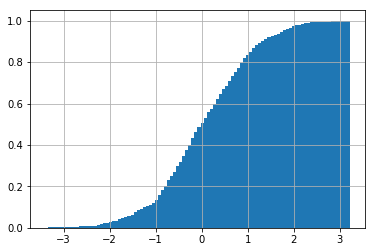

In [57]:
import pandas as pd
import numpy as np

ser = pd.Series(np.random.normal(size=1000))

ser.hist(cumulative=True, density=1, bins=100)

plt.show()

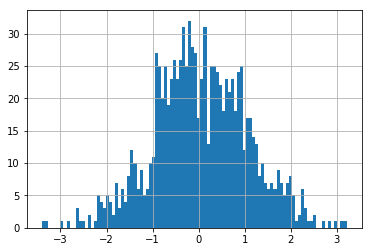

In [59]:
ser.hist(bins=100) 

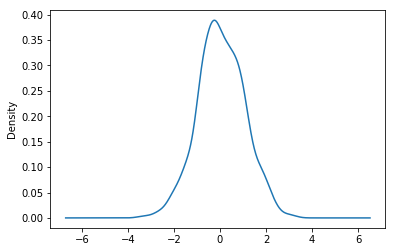

In [64]:
ser.plot.kde()  # plot probability denisty function

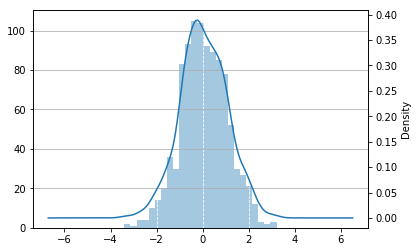

In [71]:
fig, ax1 = plt.subplots()

# 1st axis plot - the histogram
ser.hist(bins=25,cumulative=False, stacked=False, alpha=.4, ax=ax1)
   
# now the grid
ax1.grid(which='major',axis='x', color='w', linestyle='--')
ax1.grid(which='minor',axis='x', color='w', linestyle='--')

ax2 = ax1.twinx()
ser.plot.kde(ax=ax2)

plt.show()


In [23]:
ddist['t'] = ddist.index
ddist['t'] = ddist.apply(Str,col='t',axis=1)
ddist.index = ddist['t'] 

In [24]:
ddist

,Dataset_Counts,Dataset_Freq,Dataset_CumFreq,t
t,,,,
[ 10- 20],2,0.222222,0.222222,[ 10- 20]
[ 20- 30],1,0.111111,0.333333,[ 20- 30]
[ 30- 40],1,0.111111,0.444444,[ 30- 40]
[ 40- 50],1,0.111111,0.555556,[ 40- 50]
[ 50- 60],2,0.222222,0.777778,[ 50- 60]
[ 60- 70],0,0.000000,0.777778,[ 60- 70]
[ 70- 80],1,0.111111,0.888889,[ 70- 80]
[ 80- 90],0,0.000000,0.888889,[ 80- 90]
[ 90-100],1,0.111111,1.000000,[ 90-100]


In [16]:
def Str(row,col,lft_sign = '[',rgt_sign = ']'):
        ''''''
        return '{}{:3.0f}-{:3.0f}{}'.format(lft_sign, row[col].left, row[col].right, rgt_sign)
    


In [32]:
df

,Dataset,bins,binned
0,10.1,"(10.0, 20.0]",[10-20]
1,20.0,"(10.0, 20.0]",[10-20]
2,30.0,"(20.0, 30.0]",[20-30]
3,40.0,"(30.0, 40.0]",[30-40]
4,50.0,"(40.0, 50.0]",[40-50]
5,55.0,"(50.0, 60.0]",[50-60]
6,60.0,"(50.0, 60.0]",[50-60]
7,75.0,"(70.0, 80.0]",[70-80]
8,90.2,"(90.0, 100.0]",[90-100]


In [ ]:
Min = 10.123
Max = 20.123
bin_step= 2

def GenBins(Min, Max, bin_step):
    '''Generate the bins automatically based on extrema and bin step'''
    
    # the bins
    Min = float(Min)
    Max = float(Max)
    bin_step = float(bin_step)
    
    bins_list = np.arange(int(Min), Max+bin_step, bin_step)

    # the bins label
    lft_sign = '['
    rgt_sign = ']'
    
    bins_labels = []
    
    for b in bins_list.tolist():
        
        # numpy.where(array==item)
    
        if bins_list.tolist().index(b)== 0:
            bb = '{:.0f}'.format(b)
        else: 
            bins_labels.append(lft_sign+str(bb)+'-'+'{:.0f}'.format(b)+rgt_sign)
            bb = '{:.0f}'.format(b)
    
    return bins_list, bins_labels


bins_list, bins_label = GenBins(Min, Max, 2)

In [ ]:
def GenDistribution(dataframe,col, bins_list, bin_labels=None):
    ''''''
    Min  = dataframe[col].min()
    Max  = dataframe[col].max()
    Mean = dataframe[col].mean()
    
    print(' The data as a max of {:.4f},  a min of {:.4f} with a arithmetic average of {:.4f}'.format(Max, Min, Mean) )
    
    # Assign the bins to each record
    dataframe['bins']   = pd.cut(dataframe[col], bins=bins_list)
    
    # Assign the labelled bin to each record
    dataframe['binned'] = pd.cut(dataframe[col], bins=bins_list, labels = bin_labels)
    
    Distribution = dataframe.groupby(pd.cut(dataframe[col], bins=bins_list)).size().to_frame(name= col+'_Counts')
    Distribution[col+'_Freq']    = Distribution[col+'_Counts']/len(df)
    Distribution[col+'_CumFreq'] = Distribution[col+'_Freq'].cumsum()
    
    return dataframe, Distribution
 
   
data = [44,240,255,139,22,156,127,286,10.2]
df = pd.DataFrame({'Dataset':data})  

df, ddist = GenDistribution(df, 'Dataset',[0, 20, 80, 140, 200, 260, 290])

display(df)
display(ddist)

In [ ]:
%matplotlib inline
df['Dataset'].hist(bins=bins)

# Generate Random distribution from P10, P50, P90

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import norm
import scipy.stats
from IPython.display import display, HTML

%matplotlib inline

def GenDistribution(dataframe,col, bins_list, bin_labels=None):
    ''''''
    Min  = dataframe[col].min()
    Max  = dataframe[col].max()
    Mean = dataframe[col].mean()
    
    print(' The data as a max of {:.4f},  a min of {:.4f} with a arithmetic average of {:.4f}'.format(Max, Min, Mean) )
    
    # Assign the bins to each record
    dataframe['bins']   = pd.cut(dataframe[col], bins=bins_list)
    
    # Assign the labelled bin to each record
    dataframe['binned'] = pd.cut(dataframe[col], bins=bins_list, labels = bin_labels)
    
    Distribution = dataframe.groupby(pd.cut(dataframe[col], bins=bins_list)).size().to_frame(name= col+'_Counts')
    Distribution[col+'_Freq']    = Distribution[col+'_Counts']/len(dataframe)
    Distribution[col+'_CumFreq'] = Distribution[col+'_Freq'].cumsum()
    
    return dataframe, Distribution


def myerson(p10, p50, p90, number_of_samples):
    b_mark = ((float(p90) - float(p50)) / (float(p50) - float(p10)))
    samples = []
    for i in range(number_of_samples):
        rand_numb = random.random()
        factor = norm.ppf(rand_numb, 0, 0.780304146072379)
        if 0.9999 < b_mark < 1.0001: 
            sample = p50 + (p90 - p50) * factor
        else:
            sample = p50 + (p90 - p50)*((b_mark**factor - 1)/(b_mark - 1))
        samples.append(sample)
    return samples

def PlotDistribution(dataframe_samples,dataframe_distribution,  col, xmin, xmax, bins):
    
    fig, ax1 = plt.subplots()

    # 1st axis plot - the histogram
    ax1.set_xlim(xmin,xmax)

    ax1.hist(dataframe_samples[col],bins=bins,cumulative=False, stacked=False, alpha=.4)
    ax1.grid(which='major',axis='x', color='w', linestyle='--')
    
    # 2nd axis - the cumulative frequency
    ax2 = ax1.twinx()

    ax2.plot(np.arange(134,72.5,  -5),dataframe_distribution[col+'_CumFreq'], color='r', alpha=.7)
    
    # draw the P10,P50 and P90 lines
    ax2.plot([xmin,xmax], [.1, .1], color='grey', linestyle='--', linewidth = 1, alpha=.5)
    ax2.plot([xmin,xmax], [.5, .5], color='grey', linestyle='--', linewidth = 1, alpha=.5)
    ax2.plot([xmin,xmax], [.9, .9], color='grey', linestyle='--', linewidth = 1, alpha=.5)

    plt.show()
    

## run

In [ ]:
p10_in = 90
p50_in = 100
p90_in = 110  # in fact P10
numberofsamples = 10000
data = myerson(p10_in, p50_in, p90_in, numberofsamples)

p10_out = np.percentile(data,10)
p50_out = np.percentile(data,50)
p90_out = np.percentile(data,90)

print(' P10in : {:.4f}  => P10out : {:.4f}'.format(p10_in,p10_out ))
print(' P50in : {:.4f}  => P50out : {:.4f}'.format(p50_in,p50_out ))
print(' P90in : {:.4f}  => P90out : {:.4f}'.format(p90_in,p90_out ))

dSamples = pd.DataFrame({'Sample':data})

x = np.arange(1,len(data)+1,1)

plt.scatter(x, data, s=1)
plt.ylabel('some numbers')
plt.show()

bins = np.arange(70,140,5)

dSamples, dDist = GenDistribution(dSamples, 'Sample',bins_list= bins)
display(dSamples[:2])

PlotDistribution(dSamples,dDist, 'Sample', 70,135,bins)

In [ ]:
def SetGrid(axis_obj, Gmin, Gmax, Major_step, Minor_step=None, axis='both'):
    ''''''

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(Gmin, Gmax, Major_step)
    minor_ticks = np.arange(Gmin, Gmax, Minor_step)

    if axis == 'both':
        axis_obj.set_xticks(major_ticks)
        axis_obj.set_xticks(minor_ticks, minor=True)

        axis_obj.set_yticks(major_ticks)
        if minor_ticks != None:
            axis_obj.set_yticks(minor_ticks, minor=True)
        
         # And a corresponding grid
        axis_obj.grid(which='both')
        
    elif axis == 0:
        axis_obj.set_xticks(major_ticks)
        axis_obj.set_xticks(minor_ticks, minor=True)
        # And a corresponding grid

    elif axis == 1:
        axis_obj.set_yticks(major_ticks)
        axis_obj.set_yticks(minor_ticks, minor=True)
        # And a corresponding grid
    else:
        print('axis="both", 0 for a or 1 for y')
        return
  
    # Or if you want different settings for the grids:
    axis_obj.grid(which='minor', alpha=0.2)
    axis_obj.grid(which='major', alpha=0.5)


In [ ]:
def PlotDistribution(dataframe_samples,dataframe_distribution,  col, xmin, xmax, bins):
    
    fig, ax1 = plt.subplots()

    # 1st axis plot - the histogram
    ax1.set_xlim(xmin,xmax)
    
    ax1.hist(dataframe_samples[col],bins=bins,cumulative=False, stacked=False, alpha=.4)
    
    # now the grid
    minor_ticks = np.arange(70,135, 5)
    ax1.set_xticks(minor_ticks, minor=True)
    ax1.grid(which='major',axis='x', color='w', linestyle='--')
    ax1.grid(which='minor',axis='x', color='w', linestyle='--')
    
    # 2nd axis - the cumulative frequency
    ax2 = ax1.twinx()

    ax2.plot(np.arange(134,72.5,  -5),dataframe_distribution[col+'_CumFreq'], color='r', alpha=.7)
    
    # draw the P10,P50 and P90 lines
    ax2.plot([xmin,xmax], [.1, .1], color='grey', linestyle='--', linewidth = 1, alpha=.5)
    ax2.plot([xmin,xmax], [.5, .5], color='grey', linestyle='--', linewidth = 1, alpha=.5)
    ax2.plot([xmin,xmax], [.9, .9], color='grey', linestyle='--', linewidth = 1, alpha=.5)

    plt.show()

# Parameters sensitivities beta function

In [49]:
import scipy.stats
% matplotlib inline

## Alpha variations

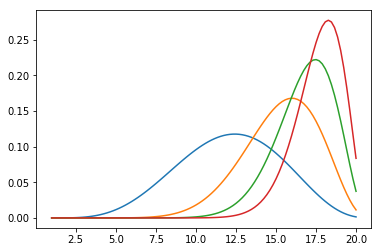

In [50]:
#fig, ax = plt.subplots()
alpha = 12
beta = 4
scale = 20
location = 1

for i in np.arange(5, 25,5):
    
    my_dist = scipy.stats.beta(i, beta, scale=20, loc=location)
    x = np.linspace(min_val, max_val, 100)
    plt.plot(x, my_dist.pdf(x))

## Beta variations

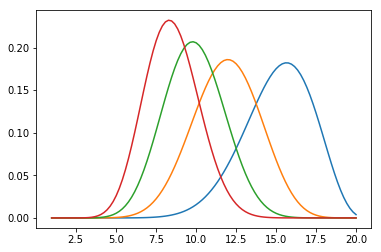

In [52]:
#fig, ax = plt.subplots()
alpha = 12
beta = 4
scale = 20
location = 1

for i in np.arange(5, 25,5):
    
    my_dist = scipy.stats.beta(alpha, i, scale=20, loc=location)
    x = np.linspace(min_val, max_val, 100)
    plt.plot(x, my_dist.pdf(x))

## Scale variations

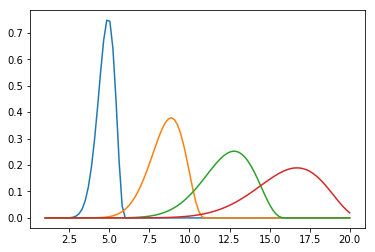

In [51]:
min_val = 1
max_val = 20

#fig, ax = plt.subplots()
alpha = 12
beta = 4
scale = 20
location = 1

for i in np.arange(5, 25,5):
    
    my_dist = scipy.stats.beta(alpha, beta, scale=i, loc=location)
    x = np.linspace(min_val, max_val, 100)
    plt.plot(x, my_dist.pdf(x))
    